In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Datasets/lita-geography-data.csv /content

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

# Import library algoritma hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Import library algoritma dbscan
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw_df= pd.read_csv('/content/lita-geography-data.csv')

raw_df.head()

,time,latitude,longitude,depth,mag,magType,gap,dmin,rms,net,place,Unnamed: 11,kategori,Unnamed: 13
0,10-Jul-21,-0.9611,120.0897,10.00,4.4,mb,136.0,2.171,0.80,us,'25 km ESE of Palu,Indonesia','kelas rendah',NaN
1,2-May-21,-1.4605,120.1564,10.00,4.4,mb,63.0,2.629,0.89,us,'66 km W of Poso,Indonesia','kelas rendah',NaN
2,1-May-21,-1.5462,120.2745,10.00,4.6,mb,89.0,2.546,0.54,us,'55 km WSW of Poso,Indonesia','kelas sedang',NaN
3,30-Apr-21,-1.5400,120.2267,18.97,4.5,mb,73.0,2.592,0.87,us,'60 km WSW of Poso,Indonesia','kelas sedang',NaN
4,21-Aug-20,-1.5194,120.0765,10.00,4.7,mb,92.0,2.706,0.54,us,'71 km SSE of Palu,Indonesia','kelas sedang',NaN


In [ ]:
df= raw_df.copy()
df

,time,latitude,longitude,depth,mag,magType,gap,dmin,rms,net,place,Unnamed: 11,kategori,Unnamed: 13
0,10-Jul-21,-0.9611,120.0897,10.00,4.4,mb,136.000000,2.17100,0.80,us,'25 km ESE of Palu,Indonesia','kelas rendah',NaN
1,2-May-21,-1.4605,120.1564,10.00,4.4,mb,63.000000,2.62900,0.89,us,'66 km W of Poso,Indonesia','kelas rendah',NaN
2,1-May-21,-1.5462,120.2745,10.00,4.6,mb,89.000000,2.54600,0.54,us,'55 km WSW of Poso,Indonesia','kelas sedang',NaN
3,30-Apr-21,-1.5400,120.2267,18.97,4.5,mb,73.000000,2.59200,0.87,us,'60 km WSW of Poso,Indonesia','kelas sedang',NaN
4,21-Aug-20,-1.5194,120.0765,10.00,4.7,mb,92.000000,2.70600,0.54,us,'71 km SSE of Palu,Indonesia','kelas sedang',NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1-Jul-02,-1.4090,120.2170,43.10,5.3,mwc,85.086087,2.53019,1.00,us,'59 km W of Poso,Indonesia','kelas sedang',NaN
117,30-May-02,-1.3940,119.6900,33.00,5.3,mwc,85.086087,2.53019,1.10,us,'Sulawesi,Indonesia','kelas sedang',NaN
118,30-Nov-01,-1.2030,119.9220,38.30,5.2,mwc,85.086087,2.53019,1.14,us,'33 km S of Palu,Indonesia','kelas sedang',NaN
119,1-Jul-01,-0.9730,120.0860,33.00,4.8,mb,85.086087,2.53019,0.82,us,'24 km ESE of Palu,Indonesia','kelas sedang',NaN


In [ ]:
df.columns[11]

'Unnamed: 11'

In [ ]:
temp_arr= df.columns.values.copy()
temp_arr[11]= "nationality"

df.columns= temp_arr
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'gap',
       'dmin', 'rms', 'net', 'place', 'nationality', 'kategori',
       'Unnamed: 13'],
      dtype='object')

In [ ]:
df.iloc[56,:]

time                28-Sep-18
latitude              -0.8748
longitude            120.0342
depth                    10.0
mag                       5.7
magType                    mb
gap                      24.0
dmin                    2.109
rms                      0.82
net                        us
place               'Minahasa
nationality          Sulawesi
kategori           Indonesia'
Unnamed: 13    'kelas Tinggi'
Name: 56, dtype: object

In [ ]:
df.loc[56,"nationality"]= df.loc[56, "kategori"]
df.loc[56,"kategori"]= df.iloc[56, -1]

df.loc[56, :]

time                28-Sep-18
latitude              -0.8748
longitude            120.0342
depth                    10.0
mag                       5.7
magType                    mb
gap                      24.0
dmin                    2.109
rms                      0.82
net                        us
place               'Minahasa
nationality        Indonesia'
kategori       'kelas Tinggi'
Unnamed: 13    'kelas Tinggi'
Name: 56, dtype: object

In [ ]:
df= df.iloc[:,:-1]
df

,time,latitude,longitude,depth,mag,magType,gap,dmin,rms,net,place,nationality,kategori
0,10-Jul-21,-0.9611,120.0897,10.00,4.4,mb,136.000000,2.17100,0.80,us,'25 km ESE of Palu,Indonesia','kelas rendah'
1,2-May-21,-1.4605,120.1564,10.00,4.4,mb,63.000000,2.62900,0.89,us,'66 km W of Poso,Indonesia','kelas rendah'
2,1-May-21,-1.5462,120.2745,10.00,4.6,mb,89.000000,2.54600,0.54,us,'55 km WSW of Poso,Indonesia','kelas sedang'
3,30-Apr-21,-1.5400,120.2267,18.97,4.5,mb,73.000000,2.59200,0.87,us,'60 km WSW of Poso,Indonesia','kelas sedang'
4,21-Aug-20,-1.5194,120.0765,10.00,4.7,mb,92.000000,2.70600,0.54,us,'71 km SSE of Palu,Indonesia','kelas sedang'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1-Jul-02,-1.4090,120.2170,43.10,5.3,mwc,85.086087,2.53019,1.00,us,'59 km W of Poso,Indonesia','kelas sedang'
117,30-May-02,-1.3940,119.6900,33.00,5.3,mwc,85.086087,2.53019,1.10,us,'Sulawesi,Indonesia','kelas sedang'
118,30-Nov-01,-1.2030,119.9220,38.30,5.2,mwc,85.086087,2.53019,1.14,us,'33 km S of Palu,Indonesia','kelas sedang'
119,1-Jul-01,-0.9730,120.0860,33.00,4.8,mb,85.086087,2.53019,0.82,us,'24 km ESE of Palu,Indonesia','kelas sedang'


## Feature Engineering

In [ ]:
def cleanse_string(x):
    return x.replace("'", "").strip().lower()

In [ ]:
string_columns= list(df.select_dtypes(include=['object']).columns.values)
string_columns

NameError: ignored

In [ ]:
for col in string_columns:
    df[col]= df[col].map(lambda x: cleanse_string(x))

In [ ]:
df

,time,latitude,longitude,depth,mag,magType,gap,dmin,rms,net,place,nationality,kategori
0,10-jul-21,-0.9611,120.0897,10.00,4.4,mb,136.000000,2.17100,0.80,us,25 km ese of palu,indonesia,kelas rendah
1,2-may-21,-1.4605,120.1564,10.00,4.4,mb,63.000000,2.62900,0.89,us,66 km w of poso,indonesia,kelas rendah
2,1-may-21,-1.5462,120.2745,10.00,4.6,mb,89.000000,2.54600,0.54,us,55 km wsw of poso,indonesia,kelas sedang
3,30-apr-21,-1.5400,120.2267,18.97,4.5,mb,73.000000,2.59200,0.87,us,60 km wsw of poso,indonesia,kelas sedang
4,21-aug-20,-1.5194,120.0765,10.00,4.7,mb,92.000000,2.70600,0.54,us,71 km sse of palu,indonesia,kelas sedang
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1-jul-02,-1.4090,120.2170,43.10,5.3,mwc,85.086087,2.53019,1.00,us,59 km w of poso,indonesia,kelas sedang
117,30-may-02,-1.3940,119.6900,33.00,5.3,mwc,85.086087,2.53019,1.10,us,sulawesi,indonesia,kelas sedang
118,30-nov-01,-1.2030,119.9220,38.30,5.2,mwc,85.086087,2.53019,1.14,us,33 km s of palu,indonesia,kelas sedang
119,1-jul-01,-0.9730,120.0860,33.00,4.8,mb,85.086087,2.53019,0.82,us,24 km ese of palu,indonesia,kelas sedang


Hapus magtype

In [ ]:
df.drop('magType', axis='columns', inplace=True)
df

,time,latitude,longitude,depth,mag,gap,dmin,rms,net,place,nationality,kategori
0,10-jul-21,-0.9611,120.0897,10.00,4.4,136.000000,2.17100,0.80,us,25 km ese of palu,indonesia,kelas rendah
1,2-may-21,-1.4605,120.1564,10.00,4.4,63.000000,2.62900,0.89,us,66 km w of poso,indonesia,kelas rendah
2,1-may-21,-1.5462,120.2745,10.00,4.6,89.000000,2.54600,0.54,us,55 km wsw of poso,indonesia,kelas sedang
3,30-apr-21,-1.5400,120.2267,18.97,4.5,73.000000,2.59200,0.87,us,60 km wsw of poso,indonesia,kelas sedang
4,21-aug-20,-1.5194,120.0765,10.00,4.7,92.000000,2.70600,0.54,us,71 km sse of palu,indonesia,kelas sedang
...,...,...,...,...,...,...,...,...,...,...,...,...
116,1-jul-02,-1.4090,120.2170,43.10,5.3,85.086087,2.53019,1.00,us,59 km w of poso,indonesia,kelas sedang
117,30-may-02,-1.3940,119.6900,33.00,5.3,85.086087,2.53019,1.10,us,sulawesi,indonesia,kelas sedang
118,30-nov-01,-1.2030,119.9220,38.30,5.2,85.086087,2.53019,1.14,us,33 km s of palu,indonesia,kelas sedang
119,1-jul-01,-0.9730,120.0860,33.00,4.8,85.086087,2.53019,0.82,us,24 km ese of palu,indonesia,kelas sedang


In [ ]:
df['net'].unique(), df['nationality'].unique()

(array(['us'], dtype=object), array(['indonesia'], dtype=object))

Hapus col net sama nationality

In [ ]:
df.drop(['net', 'nationality'], axis='columns', inplace=True)
df

,time,latitude,longitude,depth,mag,gap,dmin,rms,place,kategori
0,10-jul-21,-0.9611,120.0897,10.00,4.4,136.000000,2.17100,0.80,25 km ese of palu,kelas rendah
1,2-may-21,-1.4605,120.1564,10.00,4.4,63.000000,2.62900,0.89,66 km w of poso,kelas rendah
2,1-may-21,-1.5462,120.2745,10.00,4.6,89.000000,2.54600,0.54,55 km wsw of poso,kelas sedang
3,30-apr-21,-1.5400,120.2267,18.97,4.5,73.000000,2.59200,0.87,60 km wsw of poso,kelas sedang
4,21-aug-20,-1.5194,120.0765,10.00,4.7,92.000000,2.70600,0.54,71 km sse of palu,kelas sedang
...,...,...,...,...,...,...,...,...,...,...
116,1-jul-02,-1.4090,120.2170,43.10,5.3,85.086087,2.53019,1.00,59 km w of poso,kelas sedang
117,30-may-02,-1.3940,119.6900,33.00,5.3,85.086087,2.53019,1.10,sulawesi,kelas sedang
118,30-nov-01,-1.2030,119.9220,38.30,5.2,85.086087,2.53019,1.14,33 km s of palu,kelas sedang
119,1-jul-01,-0.9730,120.0860,33.00,4.8,85.086087,2.53019,0.82,24 km ese of palu,kelas sedang


Hapus kategori

In [ ]:
label= df['kategori'].values

label

array(['kelas rendah', 'kelas rendah', 'kelas sedang', 'kelas sedang',
       'kelas sedang', 'kelas rendah', 'kelas sedang', 'kelas rendah',
       'kelas sedang', 'kelas rendah', 'kelas rendah', 'kelas rendah',
       'kelas sedang', 'kelas sedang', 'kelas rendah', 'kelas rendah',
       'kelas rendah', 'kelas rendah', 'kelas sedang', 'kelas sedang',
       'kelas sedang', 'kelas sedang', 'kelas sedang', 'kelas sedang',
       'kelas sedang', 'kelas sedang', 'kelas sedang', 'kelas sedang',
       'kelas rendah', 'kelas rendah', 'kelas sedang', 'kelas sedang',
       'kelas rendah', 'kelas sedang', 'kelas rendah', 'kelas rendah',
       'kelas rendah', 'kelas sedang', 'kelas rendah', 'kelas rendah',
       'kelas sedang', 'kelas rendah', 'kelas rendah', 'kelas sedang',
       'kelas sedang', 'kelas sedang', 'kelas sedang', 'kelas sedang',
       'kelas sedang', 'kelas rendah', 'kelas rendah', 'kelas sedang',
       'kelas sedang', 'kelas sedang', 'kelas sedang', 'kelas tinggi',
      

In [ ]:
df.drop('kategori', axis='columns', inplace=True)
df

,time,latitude,longitude,depth,mag,gap,dmin,rms,place
0,10-jul-21,-0.9611,120.0897,10.00,4.4,136.000000,2.17100,0.80,25 km ese of palu
1,2-may-21,-1.4605,120.1564,10.00,4.4,63.000000,2.62900,0.89,66 km w of poso
2,1-may-21,-1.5462,120.2745,10.00,4.6,89.000000,2.54600,0.54,55 km wsw of poso
3,30-apr-21,-1.5400,120.2267,18.97,4.5,73.000000,2.59200,0.87,60 km wsw of poso
4,21-aug-20,-1.5194,120.0765,10.00,4.7,92.000000,2.70600,0.54,71 km sse of palu
...,...,...,...,...,...,...,...,...,...
116,1-jul-02,-1.4090,120.2170,43.10,5.3,85.086087,2.53019,1.00,59 km w of poso
117,30-may-02,-1.3940,119.6900,33.00,5.3,85.086087,2.53019,1.10,sulawesi
118,30-nov-01,-1.2030,119.9220,38.30,5.2,85.086087,2.53019,1.14,33 km s of palu
119,1-jul-01,-0.9730,120.0860,33.00,4.8,85.086087,2.53019,0.82,24 km ese of palu


## Feature Engineer

Ekstrak  place (ambil kata terakhir dari kolom place)

In [ ]:
temp_place= df['place'].map(lambda x: x.split(' ')[-1])

temp_place.unique()

array(['palu', 'poso', 'minahasa', 'sulawesi'], dtype=object)

In [ ]:
Counter(temp_place)

Counter({'palu': 89, 'poso': 28, 'minahasa': 1, 'sulawesi': 3})

In [ ]:
df['place']= temp_place

df

,time,latitude,longitude,depth,mag,gap,dmin,rms,place
0,10-jul-21,-0.9611,120.0897,10.00,4.4,136.000000,2.17100,0.80,palu
1,2-may-21,-1.4605,120.1564,10.00,4.4,63.000000,2.62900,0.89,poso
2,1-may-21,-1.5462,120.2745,10.00,4.6,89.000000,2.54600,0.54,poso
3,30-apr-21,-1.5400,120.2267,18.97,4.5,73.000000,2.59200,0.87,poso
4,21-aug-20,-1.5194,120.0765,10.00,4.7,92.000000,2.70600,0.54,palu
...,...,...,...,...,...,...,...,...,...
116,1-jul-02,-1.4090,120.2170,43.10,5.3,85.086087,2.53019,1.00,poso
117,30-may-02,-1.3940,119.6900,33.00,5.3,85.086087,2.53019,1.10,sulawesi
118,30-nov-01,-1.2030,119.9220,38.30,5.2,85.086087,2.53019,1.14,palu
119,1-jul-01,-0.9730,120.0860,33.00,4.8,85.086087,2.53019,0.82,palu


Kasi sama format time

In [ ]:
temp_df= df['time'].map(lambda x: x.replace('\/', '-'))

temp_df

0      10-jul-21
1       2-may-21
2       1-may-21
3      30-apr-21
4      21-aug-20
         ...    
116     1-jul-02
117    30-may-02
118    30-nov-01
119     1-jul-01
120    30-aug-00
Name: time, Length: 121, dtype: object

In [ ]:
df

,time,latitude,longitude,depth,mag,gap,dmin,rms,place
0,10-jul-21,-0.9611,120.0897,10.00,4.4,136.000000,2.17100,0.80,palu
1,2-may-21,-1.4605,120.1564,10.00,4.4,63.000000,2.62900,0.89,poso
2,1-may-21,-1.5462,120.2745,10.00,4.6,89.000000,2.54600,0.54,poso
3,30-apr-21,-1.5400,120.2267,18.97,4.5,73.000000,2.59200,0.87,poso
4,21-aug-20,-1.5194,120.0765,10.00,4.7,92.000000,2.70600,0.54,palu
...,...,...,...,...,...,...,...,...,...
116,1-jul-02,-1.4090,120.2170,43.10,5.3,85.086087,2.53019,1.00,poso
117,30-may-02,-1.3940,119.6900,33.00,5.3,85.086087,2.53019,1.10,sulawesi
118,30-nov-01,-1.2030,119.9220,38.30,5.2,85.086087,2.53019,1.14,palu
119,1-jul-01,-0.9730,120.0860,33.00,4.8,85.086087,2.53019,0.82,palu


In [ ]:
df['time']= pd.to_datetime(df['time'])
df

,time,latitude,longitude,depth,mag,gap,dmin,rms,place
0,2021-07-10,-0.9611,120.0897,10.00,4.4,136.000000,2.17100,0.80,palu
1,2021-05-02,-1.4605,120.1564,10.00,4.4,63.000000,2.62900,0.89,poso
2,2021-05-01,-1.5462,120.2745,10.00,4.6,89.000000,2.54600,0.54,poso
3,2021-04-30,-1.5400,120.2267,18.97,4.5,73.000000,2.59200,0.87,poso
4,2020-08-21,-1.5194,120.0765,10.00,4.7,92.000000,2.70600,0.54,palu
...,...,...,...,...,...,...,...,...,...
116,2002-07-01,-1.4090,120.2170,43.10,5.3,85.086087,2.53019,1.00,poso
117,2002-05-30,-1.3940,119.6900,33.00,5.3,85.086087,2.53019,1.10,sulawesi
118,2001-11-30,-1.2030,119.9220,38.30,5.2,85.086087,2.53019,1.14,palu
119,2001-07-01,-0.9730,120.0860,33.00,4.8,85.086087,2.53019,0.82,palu


In [ ]:
df.to_excel('data-lit2.xlsx', index=None)

LABEL ENCODING

In [ ]:
Le= LabelEncoder()

encoded_place_columns= Le.fit_transform(df['place'])

encoded_place_columns

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2])

In [ ]:
df2= df.copy()

df2.head()

,time,latitude,longitude,depth,mag,gap,dmin,rms,place
0,2021-07-10,-0.9611,120.0897,10.00,4.4,136.0,2.171,0.80,palu
1,2021-05-02,-1.4605,120.1564,10.00,4.4,63.0,2.629,0.89,poso
2,2021-05-01,-1.5462,120.2745,10.00,4.6,89.0,2.546,0.54,poso
3,2021-04-30,-1.5400,120.2267,18.97,4.5,73.0,2.592,0.87,poso
4,2020-08-21,-1.5194,120.0765,10.00,4.7,92.0,2.706,0.54,palu


In [ ]:
df2['place']= encoded_place_columns

df2

,time,latitude,longitude,depth,mag,gap,dmin,rms,place
0,2021-07-10,-0.9611,120.0897,10.00,4.4,136.000000,2.17100,0.80,1
1,2021-05-02,-1.4605,120.1564,10.00,4.4,63.000000,2.62900,0.89,2
2,2021-05-01,-1.5462,120.2745,10.00,4.6,89.000000,2.54600,0.54,2
3,2021-04-30,-1.5400,120.2267,18.97,4.5,73.000000,2.59200,0.87,2
4,2020-08-21,-1.5194,120.0765,10.00,4.7,92.000000,2.70600,0.54,1
...,...,...,...,...,...,...,...,...,...
116,2002-07-01,-1.4090,120.2170,43.10,5.3,85.086087,2.53019,1.00,2
117,2002-05-30,-1.3940,119.6900,33.00,5.3,85.086087,2.53019,1.10,3
118,2001-11-30,-1.2030,119.9220,38.30,5.2,85.086087,2.53019,1.14,1
119,2001-07-01,-0.9730,120.0860,33.00,4.8,85.086087,2.53019,0.82,1


Handling datetime data

In [ ]:
year = df2["time"].dt.year
month = df2["time"].dt.month
day = df2["time"].dt.day

year, month, day

(0      2021
 1      2021
 2      2021
 3      2021
 4      2020
        ... 
 116    2002
 117    2002
 118    2001
 119    2001
 120    2000
 Name: time, Length: 121, dtype: int64,
 0       7
 1       5
 2       5
 3       4
 4       8
        ..
 116     7
 117     5
 118    11
 119     7
 120     8
 Name: time, Length: 121, dtype: int64,
 0      10
 1       2
 2       1
 3      30
 4      21
        ..
 116     1
 117    30
 118    30
 119     1
 120    30
 Name: time, Length: 121, dtype: int64)

In [ ]:
df2['year']= year
df2['month']= month
df2['day']= day

df2

,time,latitude,longitude,depth,mag,gap,dmin,rms,place,year,month,day
0,2021-07-10,-0.9611,120.0897,10.00,4.4,136.000000,2.17100,0.80,1,2021,7,10
1,2021-05-02,-1.4605,120.1564,10.00,4.4,63.000000,2.62900,0.89,2,2021,5,2
2,2021-05-01,-1.5462,120.2745,10.00,4.6,89.000000,2.54600,0.54,2,2021,5,1
3,2021-04-30,-1.5400,120.2267,18.97,4.5,73.000000,2.59200,0.87,2,2021,4,30
4,2020-08-21,-1.5194,120.0765,10.00,4.7,92.000000,2.70600,0.54,1,2020,8,21
...,...,...,...,...,...,...,...,...,...,...,...,...
116,2002-07-01,-1.4090,120.2170,43.10,5.3,85.086087,2.53019,1.00,2,2002,7,1
117,2002-05-30,-1.3940,119.6900,33.00,5.3,85.086087,2.53019,1.10,3,2002,5,30
118,2001-11-30,-1.2030,119.9220,38.30,5.2,85.086087,2.53019,1.14,1,2001,11,30
119,2001-07-01,-0.9730,120.0860,33.00,4.8,85.086087,2.53019,0.82,1,2001,7,1


In [ ]:
df2= df2.drop('time', axis='columns')
df2

,latitude,longitude,depth,mag,gap,dmin,rms,place,year,month,day
0,-0.9611,120.0897,10.00,4.4,136.000000,2.17100,0.80,1,2021,7,10
1,-1.4605,120.1564,10.00,4.4,63.000000,2.62900,0.89,2,2021,5,2
2,-1.5462,120.2745,10.00,4.6,89.000000,2.54600,0.54,2,2021,5,1
3,-1.5400,120.2267,18.97,4.5,73.000000,2.59200,0.87,2,2021,4,30
4,-1.5194,120.0765,10.00,4.7,92.000000,2.70600,0.54,1,2020,8,21
...,...,...,...,...,...,...,...,...,...,...,...
116,-1.4090,120.2170,43.10,5.3,85.086087,2.53019,1.00,2,2002,7,1
117,-1.3940,119.6900,33.00,5.3,85.086087,2.53019,1.10,3,2002,5,30
118,-1.2030,119.9220,38.30,5.2,85.086087,2.53019,1.14,1,2001,11,30
119,-0.9730,120.0860,33.00,4.8,85.086087,2.53019,0.82,1,2001,7,1


In [ ]:
df2

,latitude,longitude,depth,mag,gap,dmin,rms,place,year,month,day
0,-0.9611,120.0897,10.00,4.4,136.000000,2.17100,0.80,1,2021,7,10
1,-1.4605,120.1564,10.00,4.4,63.000000,2.62900,0.89,2,2021,5,2
2,-1.5462,120.2745,10.00,4.6,89.000000,2.54600,0.54,2,2021,5,1
3,-1.5400,120.2267,18.97,4.5,73.000000,2.59200,0.87,2,2021,4,30
4,-1.5194,120.0765,10.00,4.7,92.000000,2.70600,0.54,1,2020,8,21
...,...,...,...,...,...,...,...,...,...,...,...
116,-1.4090,120.2170,43.10,5.3,85.086087,2.53019,1.00,2,2002,7,1
117,-1.3940,119.6900,33.00,5.3,85.086087,2.53019,1.10,3,2002,5,30
118,-1.2030,119.9220,38.30,5.2,85.086087,2.53019,1.14,1,2001,11,30
119,-0.9730,120.0860,33.00,4.8,85.086087,2.53019,0.82,1,2001,7,1


Normalisasi

In [ ]:
scaler= MinMaxScaler()

normalized_df= pd.DataFrame(scaler.fit_transform(df2[:]))
normalized_df.columns= df2.columns

normalized_df

,latitude,longitude,depth,mag,gap,dmin,rms,place,year,month,day
0,0.835739,0.763225,0.040640,0.24,0.732446,0.066882,0.403727,0.333333,1.000000,0.545455,0.310345
1,0.180530,0.834364,0.040640,0.24,0.290557,0.560949,0.459627,0.666667,1.000000,0.363636,0.034483
2,0.068092,0.960324,0.040640,0.32,0.447942,0.471413,0.242236,0.666667,1.000000,0.363636,0.000000
3,0.076227,0.909343,0.151108,0.28,0.351090,0.521036,0.447205,0.666667,1.000000,0.272727,1.000000
4,0.103254,0.749147,0.040640,0.36,0.466102,0.644013,0.242236,0.333333,0.952381,0.636364,0.689655
...,...,...,...,...,...,...,...,...,...,...,...
116,0.248098,0.898997,0.448276,0.60,0.424250,0.454358,0.527950,0.666667,0.095238,0.545455,0.000000
117,0.267777,0.336924,0.323892,0.60,0.424250,0.454358,0.590062,1.000000,0.095238,0.363636,1.000000
118,0.518368,0.584364,0.389163,0.56,0.424250,0.454358,0.614907,0.333333,0.047619,0.909091,1.000000
119,0.820126,0.759279,0.323892,0.40,0.424250,0.454358,0.416149,0.333333,0.047619,0.545455,0.000000


In [ ]:
normalized_df.to_excel('data-lit3.xlsx', index=None)

MODELING

In [ ]:
silhouette_score_dict= {}
davies_bouldin_score_dict= {}

In [ ]:
model_df= normalized_df.copy()
model_df

,latitude,longitude,depth,mag,gap,dmin,rms,place,year,month,day
0,0.835739,0.763225,0.040640,0.24,0.732446,0.066882,0.403727,0.333333,1.000000,0.545455,0.310345
1,0.180530,0.834364,0.040640,0.24,0.290557,0.560949,0.459627,0.666667,1.000000,0.363636,0.034483
2,0.068092,0.960324,0.040640,0.32,0.447942,0.471413,0.242236,0.666667,1.000000,0.363636,0.000000
3,0.076227,0.909343,0.151108,0.28,0.351090,0.521036,0.447205,0.666667,1.000000,0.272727,1.000000
4,0.103254,0.749147,0.040640,0.36,0.466102,0.644013,0.242236,0.333333,0.952381,0.636364,0.689655
...,...,...,...,...,...,...,...,...,...,...,...
116,0.248098,0.898997,0.448276,0.60,0.424250,0.454358,0.527950,0.666667,0.095238,0.545455,0.000000
117,0.267777,0.336924,0.323892,0.60,0.424250,0.454358,0.590062,1.000000,0.095238,0.363636,1.000000
118,0.518368,0.584364,0.389163,0.56,0.424250,0.454358,0.614907,0.333333,0.047619,0.909091,1.000000
119,0.820126,0.759279,0.323892,0.40,0.424250,0.454358,0.416149,0.333333,0.047619,0.545455,0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

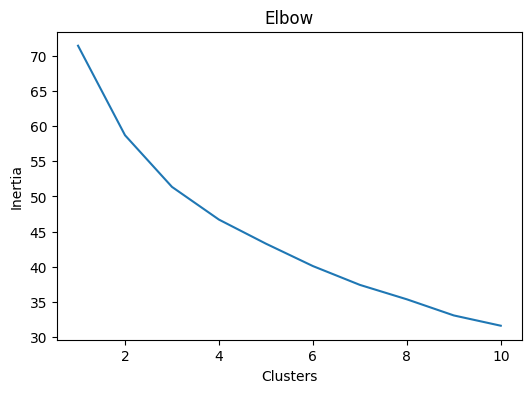

In [ ]:
clusters = []
for i in range (1,11):
    clusters.append((KMeans(n_clusters=i).fit(model_df.values)).inertia_)

fig, ax = plt.subplots(figsize=(6,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [ ]:
# Disimpulkan 4 merupakan n_cluster ideal, membuat model kmeans dengan n_cluster= 3
kmeans_model_n3= KMeans(n_clusters=3).fit(model_df)

# Menampung hasil klustering kmeans di kolom data_cluster lalu menampilkan 3 data teratas
kmeans_label= kmeans_model_n3.labels_
kmeans_label

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

<ipython-input-53-105887d50f5c>:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df2['mag'], y=df2['gap'], hue=kmeans_label, palette=sns.color_palette('gist_rainbow',4))


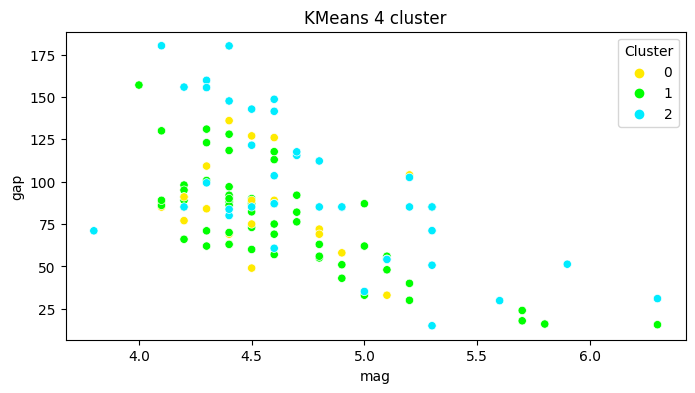

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df2['mag'], y=df2['gap'], hue=kmeans_label, palette=sns.color_palette('gist_rainbow',4))
plt.legend(title='Cluster')
plt.title('KMeans 4 cluster')

plt.show()

In [ ]:
silhouette_score_dict['kmeans'] = silhouette_score(model_df, kmeans_label)
silhouette_score_dict['kmeans']

0.17089807520268085

In [ ]:
davies_bouldin_score_dict['kmeans'] = davies_bouldin_score(model_df, kmeans_label)
davies_bouldin_score_dict['kmeans']

1.7647056503738117

DBSCAN

In [ ]:
# for i in range (2,11):
#     # clusters.append((KMeans(n_clusters=i).fit(model_df.values)).inertia_)
#     temp= KMeans(n_clusters=i).fit(model_df.values)
#     silhouette_score_average = silhouette_score(model_df.drop('kmeans', axis='columns'), temp.labels_)
#     print(f'i= {i}, score= {silhouette_score_average}')

In [ ]:
db= DBSCAN(metric='euclidean')
db.fit(normalized_df)

db_label= db.labels_
db_label

array([-1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1,
        0,  1,  1,  1, -1,  1,  1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  2,  2, -1,
        2, -1, -1, -1, -1, -1, -1,  2,  2, -1, -1, -1, -1, -1,  2,  2, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1])

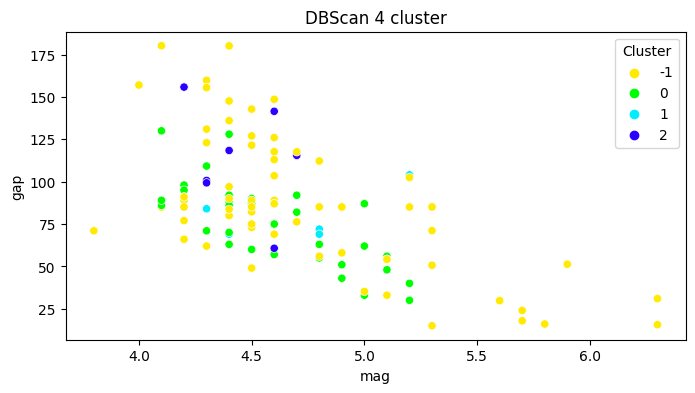

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df2['mag'], y=df2['gap'], hue=db_label, palette=sns.color_palette('gist_rainbow',4))
plt.legend(title='Cluster')
plt.title('DBScan 4 cluster')

plt.show()

In [ ]:
silhouette_score_dict['dbscan'] = silhouette_score(model_df, db_label)
silhouette_score_dict['dbscan']

0.010049179236534232

In [ ]:
davies_bouldin_score_dict['dbscan'] = davies_bouldin_score(model_df, db_label)
davies_bouldin_score_dict['dbscan']

2.126618466164052

Agglomerative Clustering

In [ ]:
agglo_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agglo_model.fit(model_df)
agglo_labels = agglo_model.labels_

agglo_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

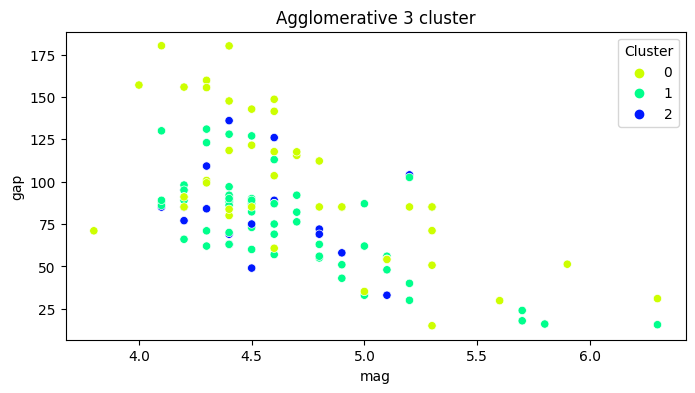

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df2['mag'], y=df2['gap'], hue=agglo_labels, palette=sns.color_palette('gist_rainbow',3))
plt.legend(title='Cluster')
plt.title('Agglomerative 3 cluster')

plt.show()

In [ ]:
silhouette_score_dict['agglomerative'] = silhouette_score(model_df, agglo_labels)
silhouette_score_dict['agglomerative']

0.1570366648986804

In [ ]:
davies_bouldin_score_dict['agglomerative'] = davies_bouldin_score(model_df, agglo_labels)
davies_bouldin_score_dict['agglomerative']

1.8305479174492554

KMedoids

In [ ]:
# Karena telah mengetahui n_cluster yang pas, maka langsung dibuat modelnya
kmedoids_model= KMedoids(n_clusters=3, random_state=0).fit(model_df)

# Menampung hasil klustering kmedoids di kolom data_cluster lalu menampilkan 3 data teratas
kmedoids_label= kmedoids_model.labels_
kmedoids_label

array([2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0])

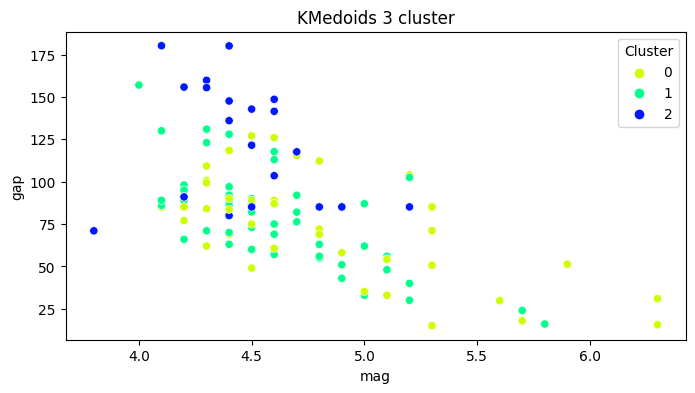

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df2['mag'], y=df2['gap'], hue=kmedoids_label, palette=sns.color_palette('gist_rainbow',3))
plt.legend(title='Cluster')
plt.title('KMedoids 3 cluster')

plt.show()

In [ ]:
silhouette_score_dict['kmedoids'] = silhouette_score(model_df, kmedoids_label)
silhouette_score_dict['kmedoids']

0.14506167882917617

In [ ]:
davies_bouldin_score_dict['kmedoids'] = davies_bouldin_score(model_df, kmedoids_label)
davies_bouldin_score_dict['kmedoids']

2.5656276892786236

Conclusion

In [ ]:
silhouette_score_dict

{'kmeans': 0.17089807520268085,
 'dbscan': 0.010049179236534232,
 'agglomerative': 0.1570366648986804,
 'kmedoids': 0.14506167882917617}

In [ ]:
davies_bouldin_score_dict

{'kmeans': 1.7647056503738117,
 'dbscan': 2.126618466164052,
 'agglomerative': 1.8305479174492554,
 'kmedoids': 2.5656276892786236}

In [ ]:
conclusion_df= pd.DataFrame.from_dict(silhouette_score_dict, orient='index', columns= ['silhouette score']).T
conclusion_df= conclusion_df.append(davies_bouldin_score_dict, ignore_index=True)
conclusion_df.index= ['silhouette score', 'davies bouldin score']
conclusion_df= conclusion_df.T

conclusion_df

<ipython-input-111-d95f1f6f04a1>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conclusion_df= conclusion_df.append(davies_bouldin_score_dict, ignore_index=True)


,silhouette score,davies bouldin score
kmeans,0.170898,1.764706
dbscan,0.010049,2.126618
agglomerative,0.157037,1.830548
kmedoids,0.145062,2.565628
